In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [4]:
#dataset from https://www.kaggle.com/pronto/cycle-share-dataset
trip = pd.read_csv("cycle-share-dataset/trip.csv", skiprows=50794, 
                   names = ["trip_id", "starttime", "stoptime", "bikeid","tripduration","from_station_name","to_station_id","from_station_id","to_station_id","usertype","gender","birthyear"])

Context

The Pronto Cycle Share system consists of 500 bikes and 54 stations located in Seattle. Pronto provides open data on individual trips, stations, and daily weather.


### Trip dataset

trip_id: numeric ID of bike trip taken

starttime: day and time trip started, in PST

stoptime: day and time trip ended, in PST

bikeid: ID attached to each bike

tripduration: time of trip in seconds

from_station_name: name of station where trip originated

to_station_name: name of station where trip terminated

from_station_id: ID of station where trip originated

to_station_id: ID of station where trip terminated

usertype: "Short-Term Pass Holder" is a rider who purchased a 24-Hour or 3-Day Pass; "Member" is a rider who purchased a Monthly or an Annual Membership

gender: gender of rider

birthyear: birth year of rider

In [5]:
trip.head(10)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_id,from_station_id,to_station_id.1,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0
5,436,10/13/2014 10:34,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974.0
6,437,10/13/2014 11:35,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978.0
7,438,10/13/2014 11:35,10/13/2014 11:45,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1983.0
8,439,10/13/2014 11:35,10/13/2014 11:45,SEA00486,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Female,1974.0
9,440,10/13/2014 11:35,10/13/2014 11:45,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1958.0


In [6]:
trip.describe()

,trip_id,tripduration,birthyear
count,236065.000000,236065.00000,146167.000000
mean,130059.869333,1202.61221,1979.879740
std,72842.289278,2066.42488,10.154978
min,431.000000,60.00800,1931.000000
25%,67746.000000,392.26500,1975.000000
50%,130526.000000,633.23500,1983.000000
75%,192900.000000,1145.01500,1987.000000
max,255245.000000,28794.39800,1999.000000


In [7]:
trip.shape

(236065, 12)

In [8]:
trip['from_station_name'].value_counts()

Pier 69 / Alaskan Way & Clay St                                           11274
E Pine St & 16th Ave                                                       9466
3rd Ave & Broad St                                                         9392
2nd Ave & Pine St                                                          8198
Westlake Ave & 6th Ave                                                     8188
Cal Anderson Park / 11th Ave & Pine St                                     7690
E Harrison St & Broadway Ave E                                             7685
2nd Ave & Vine St                                                          6568
Key Arena / 1st Ave N & Harrison St                                        6402
REI / Yale Ave N & John St                                                 6401
15th Ave E & E Thomas St                                                   6206
Dexter Ave N & Aloha St                                                    5917
PATH / 9th Ave & Westlake Ave           

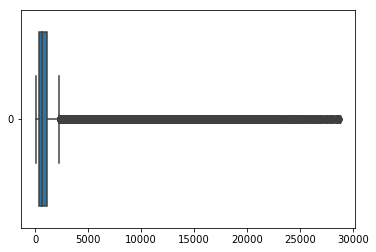

In [9]:
sns.boxplot(data=trip['tripduration'], orient="h")

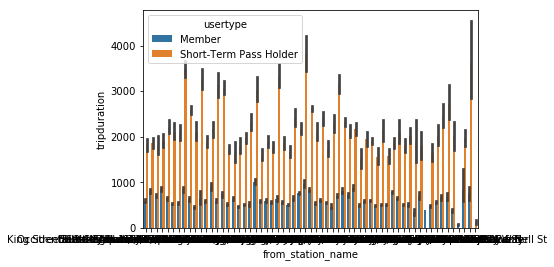

In [10]:
sns.barplot(x="from_station_name", y="tripduration", hue="usertype", data=trip)

In [74]:
#from Pandas Time Series Basics: https://chrisalbon.com/python/pandas_time_series_basics.html
trip['starttime'] = pd.to_datetime(trip['starttime'])

In [87]:
trip.index = trip['starttime']

In [90]:
trip['2015']

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_id,from_station_id,to_station_id.1,usertype,gender,birthyear
starttime,,,,,,,,,,,,
2015-01-01 00:24:00,25091,2015-01-01 00:24:00,1/1/2015 0:48,SEA00325,1403.479,Lake Union Park / Valley St & Boren Ave N,12th Ave & E Mercer St,SLU-17,CH-15,Short-Term Pass Holder,NaN,NaN
2015-01-01 00:37:00,25092,2015-01-01 00:37:00,1/1/2015 0:44,SEA00267,459.469,Harvard Ave & E Pine St,Cal Anderson Park / 11th Ave & Pine St,CH-09,CH-08,Member,Male,1991.0
2015-01-01 00:44:00,25093,2015-01-01 00:44:00,1/1/2015 0:48,SEA00124,255.004,Harvard Ave & E Pine St,REI / Yale Ave N & John St,CH-09,SLU-01,Member,Male,1987.0
2015-01-01 01:36:00,25094,2015-01-01 01:36:00,1/1/2015 1:42,SEA00327,373.146,12th Ave & E Mercer St,Summit Ave & E Denny Way,CH-15,CH-01,Short-Term Pass Holder,NaN,NaN
2015-01-01 01:45:00,25099,2015-01-01 01:45:00,1/1/2015 1:48,SEA00327,177.257,Summit Ave & E Denny Way,Summit Ave & E Denny Way,CH-01,CH-01,Short-Term Pass Holder,NaN,NaN
2015-01-01 01:54:00,25100,2015-01-01 01:54:00,1/1/2015 2:36,SEA00374,2527.307,Summit Ave & E Denny Way,Summit Ave & E Denny Way,CH-01,CH-01,Short-Term Pass Holder,NaN,NaN
2015-01-01 01:56:00,25102,2015-01-01 01:56:00,1/1/2015 2:36,SEA00469,2401.616,Summit Ave & E Denny Way,Summit Ave & E Denny Way,CH-01,CH-01,Short-Term Pass Holder,NaN,NaN
2015-01-01 02:01:00,25104,2015-01-01 02:01:00,1/1/2015 2:09,SEA00483,463.284,3rd Ave & Broad St,2nd Ave & Vine St,BT-01,BT-03,Short-Term Pass Holder,NaN,NaN
2015-01-01 02:02:00,25105,2015-01-01 02:02:00,1/1/2015 2:09,SEA00194,374.388,3rd Ave & Broad St,2nd Ave & Vine St,BT-01,BT-03,Short-Term Pass Holder,NaN,NaN


In [95]:
#from Jan 1st to 7th
trip['1/1/2015':'1/7/2015']

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_id,from_station_id,to_station_id.1,usertype,gender,birthyear
starttime,,,,,,,,,,,,
2015-01-01 00:24:00,25091,2015-01-01 00:24:00,1/1/2015 0:48,SEA00325,1403.479,Lake Union Park / Valley St & Boren Ave N,12th Ave & E Mercer St,SLU-17,CH-15,Short-Term Pass Holder,NaN,NaN
2015-01-01 00:37:00,25092,2015-01-01 00:37:00,1/1/2015 0:44,SEA00267,459.469,Harvard Ave & E Pine St,Cal Anderson Park / 11th Ave & Pine St,CH-09,CH-08,Member,Male,1991.0
2015-01-01 00:44:00,25093,2015-01-01 00:44:00,1/1/2015 0:48,SEA00124,255.004,Harvard Ave & E Pine St,REI / Yale Ave N & John St,CH-09,SLU-01,Member,Male,1987.0
2015-01-01 01:36:00,25094,2015-01-01 01:36:00,1/1/2015 1:42,SEA00327,373.146,12th Ave & E Mercer St,Summit Ave & E Denny Way,CH-15,CH-01,Short-Term Pass Holder,NaN,NaN
2015-01-01 01:45:00,25099,2015-01-01 01:45:00,1/1/2015 1:48,SEA00327,177.257,Summit Ave & E Denny Way,Summit Ave & E Denny Way,CH-01,CH-01,Short-Term Pass Holder,NaN,NaN
2015-01-01 01:54:00,25100,2015-01-01 01:54:00,1/1/2015 2:36,SEA00374,2527.307,Summit Ave & E Denny Way,Summit Ave & E Denny Way,CH-01,CH-01,Short-Term Pass Holder,NaN,NaN
2015-01-01 01:56:00,25102,2015-01-01 01:56:00,1/1/2015 2:36,SEA00469,2401.616,Summit Ave & E Denny Way,Summit Ave & E Denny Way,CH-01,CH-01,Short-Term Pass Holder,NaN,NaN
2015-01-01 02:01:00,25104,2015-01-01 02:01:00,1/1/2015 2:09,SEA00483,463.284,3rd Ave & Broad St,2nd Ave & Vine St,BT-01,BT-03,Short-Term Pass Holder,NaN,NaN
2015-01-01 02:02:00,25105,2015-01-01 02:02:00,1/1/2015 2:09,SEA00194,374.388,3rd Ave & Broad St,2nd Ave & Vine St,BT-01,BT-03,Short-Term Pass Holder,NaN,NaN


In [100]:
trip['tripduration'].resample('D').mean()

starttime
2014-10-13    1044.285328
2014-10-14    1122.172525
2014-10-15     767.384569
2014-10-16    1013.426851
2014-10-17     914.511684
2014-10-18    1469.714040
2014-10-19    1851.002778
2014-10-20     955.810476
2014-10-21     894.930457
2014-10-22     815.333340
2014-10-23     915.625503
2014-10-24    1006.921453
2014-10-25    1108.586995
2014-10-26    1234.593897
2014-10-27     893.753888
2014-10-28     961.262970
2014-10-29     799.127323
2014-10-30     650.481987
2014-10-31     702.684509
2014-11-01    1361.851765
2014-11-02    1388.331574
2014-11-03     637.508473
2014-11-04     667.297971
2014-11-05     688.660632
2014-11-06     827.459676
2014-11-07     926.194548
2014-11-08    1611.604210
2014-11-09    1361.757519
2014-11-10    1218.911653
2014-11-11     850.698300
                 ...     
2016-08-02    1087.127048
2016-08-03    1115.488772
2016-08-04    1037.585886
2016-08-05    1309.601588
2016-08-06    1968.990290
2016-08-07    2035.216338
2016-08-08    1076.588012
20

In [101]:
trip['tripduration'].resample('D').sum()

starttime
2014-10-13     427112.699
2014-10-14     550986.710
2014-10-15     240191.370
2014-10-16     400303.606
2014-10-17     268866.435
2014-10-18     586415.902
2014-10-19    1232767.850
2014-10-20     371810.275
2014-10-21     319490.173
2014-10-22     114962.001
2014-10-23     309481.420
2014-10-24     432976.225
2014-10-25     239454.791
2014-10-26     311117.662
2014-10-27     328007.677
2014-10-28     225896.798
2014-10-29     351616.022
2014-10-30     147659.411
2014-10-31     158806.699
2014-11-01     596491.073
2014-11-02     459537.751
2014-11-03     151089.508
2014-11-04     256909.719
2014-11-05     203843.547
2014-11-06     211829.677
2014-11-07     319537.119
2014-11-08     852538.627
2014-11-09     322736.532
2014-11-10     477813.368
2014-11-11     229688.541
                 ...     
2016-08-02     429415.184
2016-08-03     459581.374
2016-08-04     455500.204
2016-08-05     680992.826
2016-08-06     746247.320
2016-08-07     667550.959
2016-08-08     464009.433
20